Data Preparation
1.	Load the student marks and attendance data from the provided Excel files into two separate Pandas DataFrames.
2.	Merge the two DataFrames on the Name column to create a single DataFrame.
3.	Replace attendance values ('Y' or 'N') with numeric values (1 for 'Y' and 0 for 'N').
4.	Deal with the missing values.
5.	Do the column cleaning like name column is the combination of upper and lower case.


In [42]:
#1.	Load the student marks and attendance data from the provided Excel files into two separate Pandas DataFrames.
import pandas as pd
import numpy as np

marks_df = pd.read_excel('C:/Users/under/Downloads/Student_analysis.xlsx', sheet_name='Marks')
attendance_df = pd.read_excel('C:/Users/under/Downloads/Student_analysis.xlsx', sheet_name='Attendance')

In [44]:
marks_df

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment
0,Arjun,9,5,14,16.0
1,Sophia Hardy,8,9,113,19.0
2,RAj,10,10,15,20.0
3,Emily,9,7,11,16.0
4,Ishaan Saini,8,7,14,11.0
...,...,...,...,...,...
105,Makayla,2,7,13,3.0
106,Ishaan Kapoor,9,6,13,20.0
107,Addison,8,8,12,12.0
108,Aditya Srivastava,5,5,8,17.0


In [46]:
attendance_df

,Name,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5
0,Arjun,Y,N,N,N,Y
1,Sophia Hardy,Y,N,N,Y,Y
2,RAj,Y,Y,Y,Y,Y
3,Emily,Y,Y,N,Y,Y
4,Ishaan Saini,N,N,N,N,Y
...,...,...,...,...,...,...
105,Makayla,Y,Y,Y,Y,Y
106,Ishaan Kapoor,Y,N,N,Y,Y
107,Addison,Y,Y,Y,Y,Y
108,Aditya Srivastava,N,N,N,Y,Y


In [48]:
df1 = marks_df.sort_values(by='Name') 
df2 = attendance_df.sort_values(by='Name') 

In [50]:
#2.	Merge the two DataFrames on the Name column to create a single DataFrame.
merged_df = pd.merge(df1, df2, on='Name', how='inner')

In [52]:
merged_df

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5
0,Aaradhya,3,9,10,12.0,N,Y,N,N,N
1,Aarav,4,10,15,11.0,Y,Y,Y,N,N
2,Addison,8,8,12,12.0,Y,Y,Y,Y,Y
3,Aditi,1,9,10,16.0,N,N,N,Y,Y
4,Aditya Roy,8,1,3,12.0,Y,Y,N,Y,N
...,...,...,...,...,...,...,...,...,...,...
105,Vivian,,10,10,12.0,N,Y,Y,N,Y
106,Wyatt,10,10,14,18.0,Y,N,N,N,Y
107,Yash,8,9,13,14.0,N,N,N,Y,Y
108,Zain,3,6,14,15.0,Y,Y,Y,Y,Y


In [54]:
#3.	Replace attendance values ('Y' or 'N') with numeric values (1 for 'Y' and 0 for 'N').
attendance_columns = ['Attendance Day 1', 'Attendance Day 2', 'Attendance Day 3', 'Attendance Day 4', 'Attendance Day 5']
for col in attendance_columns:
    merged_df[col] = merged_df[col].map({'Y': 1, 'N': 0})


In [56]:
merged_df

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5
0,Aaradhya,3,9,10,12.0,0,1,0,0,0
1,Aarav,4,10,15,11.0,1,1,1,0,0
2,Addison,8,8,12,12.0,1,1,1,1,1
3,Aditi,1,9,10,16.0,0,0,0,1,1
4,Aditya Roy,8,1,3,12.0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
105,Vivian,,10,10,12.0,0,1,1,0,1
106,Wyatt,10,10,14,18.0,1,0,0,0,1
107,Yash,8,9,13,14.0,0,0,0,1,1
108,Zain,3,6,14,15.0,1,1,1,1,1


In [72]:
#4.	Deal with the missing values.
marks_columns = ['Mini Test 1', 'Mini Test 2', 'Live Test', 'Assignment']
for col in marks_columns:
    # Replace empty strings with NaN
    merged_df[col] = merged_df[col].replace(' ', np.nan)

    # Fill NaN with the median of the column
    merged_df[col] = merged_df[col].fillna(merged_df[col].median())


C:\Users\under\AppData\Local\Temp\ipykernel_6940\4108742485.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df[col] = merged_df[col].replace(' ', np.nan)


In [94]:
def correct_marks(value):
    if value > 99:  # If the value has more than two digits
        return value % 100  # we get the last two digits
    return value  # If it's already two digits,then its left unchanged

# Apply the correction to all the marks columns
marks_columns = ['Mini Test 1', 'Mini Test 2', 'Live Test', 'Assignment']
for col in marks_columns:
    merged_df[col] = merged_df[col].apply(correct_marks)


In [96]:
merged_df.describe()

,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5,Total Marks,Percentage Marks,Attendance Percentage,Weighted Percentage
count,110.000000,110.000000,110.000000,110.000000,110.00000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,5.963636,6.981818,11.436364,14.009091,0.40000,0.418182,0.427273,0.572727,0.545455,39.300000,71.454545,47.272727,62.324242
std,2.876438,2.789172,3.024449,3.820503,0.49214,0.495518,0.496946,0.496946,0.500208,12.858831,23.379693,22.130103,18.290412
min,0.000000,1.000000,2.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,13.000000,23.636364,0.000000,29.666667
25%,4.000000,5.000000,10.000000,12.000000,0.00000,0.000000,0.000000,0.000000,0.000000,34.250000,62.272727,40.000000,54.583333
50%,6.000000,8.000000,12.000000,14.000000,0.00000,0.000000,0.000000,1.000000,1.000000,39.000000,70.909091,40.000000,60.000000
75%,8.000000,9.000000,14.000000,17.000000,1.00000,1.000000,1.000000,1.000000,1.000000,44.000000,80.000000,60.000000,68.916667
max,10.000000,10.000000,15.000000,20.000000,1.00000,1.000000,1.000000,1.000000,1.000000,149.000000,270.909091,100.000000,210.666667


In [98]:
#5.	Do the column cleaning like name column is the combination of upper and lower case.
merged_df['Name'] = merged_df['Name'].str.title()

1.	Create separate columns for below:
o	Total marks for each student.
o	Percentage marks for each student.
o	Attendance percentage for each student based on attendance columns.
o	Calculate the weighted percentage – Attendance(40%), Mini test01(10%), Mini test02(10%), Live test(20%), Assignment (20%).


In [101]:
#Total marks for each student.
merged_df['Total Marks'] = merged_df[['Mini Test 1', 'Mini Test 2', 'Live Test', 'Assignment']].sum(axis=1)
print(merged_df[['Name', 'Total Marks']])

           Name  Total Marks
0      Aaradhya         34.0
1         Aarav         40.0
2       Addison         40.0
3         Aditi         36.0
4    Aditya Roy         24.0
..          ...          ...
105      Vivian         38.0
106       Wyatt         52.0
107        Yash         44.0
108        Zain         38.0
109         Zoe         32.0

[110 rows x 2 columns]


In [103]:
#Percentage marks for each student.
max_marks = 55
merged_df['Percentage Marks'] = (merged_df['Total Marks'] / (max_marks )) * 100
print(merged_df[['Name', 'Percentage Marks']])

           Name  Percentage Marks
0      Aaradhya         61.818182
1         Aarav         72.727273
2       Addison         72.727273
3         Aditi         65.454545
4    Aditya Roy         43.636364
..          ...               ...
105      Vivian         69.090909
106       Wyatt         94.545455
107        Yash         80.000000
108        Zain         69.090909
109         Zoe         58.181818

[110 rows x 2 columns]


In [105]:
#Attendance percentage for each student based on attendance columns.
merged_df['Attendance Percentage'] = (merged_df[attendance_columns].sum(axis=1) / len(attendance_columns)) * 100
print(merged_df[['Name', 'Attendance Percentage']])

           Name  Attendance Percentage
0      Aaradhya                   20.0
1         Aarav                   60.0
2       Addison                  100.0
3         Aditi                   40.0
4    Aditya Roy                   60.0
..          ...                    ...
105      Vivian                   60.0
106       Wyatt                   40.0
107        Yash                   40.0
108        Zain                  100.0
109         Zoe                   60.0

[110 rows x 2 columns]


In [107]:
#Calculate the weighted percentage – Attendance(40%), Mini test01(10%), Mini test02(10%), Live test(20%), Assignment (20%).
merged_df['Weighted Percentage'] = (
    (merged_df['Attendance Percentage'] * 0.40) + 
    ((merged_df['Mini Test 1'] / 10) * 100 * 0.10) +
    ((merged_df['Mini Test 2'] / 10) * 100 * 0.10) + 
    ((merged_df['Live Test'] /15) * 100 * 0.20) +  
    ((merged_df['Assignment'] / 20) * 100 * 0.20)
)

print(merged_df[['Name', 'Weighted Percentage']])

           Name  Weighted Percentage
0      Aaradhya            45.333333
1         Aarav            69.000000
2       Addison            84.000000
3         Aditi            55.333333
4    Aditya Roy            49.000000
..          ...                  ...
105      Vivian            65.333333
106       Wyatt            72.666667
107        Yash            64.333333
108        Zain            82.666667
109         Zoe            59.333333

[110 rows x 2 columns]


2.	Classify each student's performance into categories:
o	"Excellent" for percentages ≥ 85.
o	"Good" for percentages between 71 and 84.
o	"Average" for percentages between 50 and 70.
o	"Needs Improvement" for percentages < 50.


In [110]:
def classify_performance(weighted_percentage):
    if weighted_percentage >= 85:
        return "Excellent"
    elif 71 <= weighted_percentage < 85:
        return "Good"
    elif 50 <= weighted_percentage < 71:
        return "Average"
    else:
        return "Needs Improvement"

# Applying the classification function to the 'Weighted Percentage' column
merged_df['Performance Category'] = merged_df['Weighted Percentage'].apply(classify_performance)
print(merged_df[['Name', 'Weighted Percentage','Performance Category']])


           Name  Weighted Percentage Performance Category
0      Aaradhya            45.333333    Needs Improvement
1         Aarav            69.000000              Average
2       Addison            84.000000                 Good
3         Aditi            55.333333              Average
4    Aditya Roy            49.000000    Needs Improvement
..          ...                  ...                  ...
105      Vivian            65.333333              Average
106       Wyatt            72.666667                 Good
107        Yash            64.333333              Average
108        Zain            82.666667                 Good
109         Zoe            59.333333              Average

[110 rows x 3 columns]


In [112]:
merged_df

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5,Total Marks,Percentage Marks,Attendance Percentage,Weighted Percentage,Performance Category
0,Aaradhya,3.0,9.0,10.0,12.0,0,1,0,0,0,34.0,61.818182,20.0,45.333333,Needs Improvement
1,Aarav,4.0,10.0,15.0,11.0,1,1,1,0,0,40.0,72.727273,60.0,69.000000,Average
2,Addison,8.0,8.0,12.0,12.0,1,1,1,1,1,40.0,72.727273,100.0,84.000000,Good
3,Aditi,1.0,9.0,10.0,16.0,0,0,0,1,1,36.0,65.454545,40.0,55.333333,Average
4,Aditya Roy,8.0,1.0,3.0,12.0,1,1,0,1,0,24.0,43.636364,60.0,49.000000,Needs Improvement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Vivian,6.0,10.0,10.0,12.0,0,1,1,0,1,38.0,69.090909,60.0,65.333333,Average
106,Wyatt,10.0,10.0,14.0,18.0,1,0,0,0,1,52.0,94.545455,40.0,72.666667,Good
107,Yash,8.0,9.0,13.0,14.0,0,0,0,1,1,44.0,80.000000,40.0,64.333333,Average
108,Zain,3.0,6.0,14.0,15.0,1,1,1,1,1,38.0,69.090909,100.0,82.666667,Good


Analysis
1.	Identify students with attendance below 75% but weighted percentage >50%.
2.	Highlight the top three students based on percentage marks.
3.	Impact of attendance on Tests/Assignment marks. 


In [115]:
#	Identify students with attendance below 75% but weighted percentage >50%.
filtered_students = merged_df[(merged_df['Attendance Percentage'] < 75) & (merged_df['Weighted Percentage'] > 50)]

print("Students with Attendance < 75% and Weighted Percentage > 50%:")
filtered_students = filtered_students[['Name','Attendance Percentage', 'Weighted Percentage']]
print(filtered_students)

Students with Attendance < 75% and Weighted Percentage > 50%:
                  Name  Attendance Percentage  Weighted Percentage
1                Aarav                   60.0            69.000000
3                Aditi                   40.0            55.333333
5    Aditya Srivastava                   40.0            53.666667
7                Aidan                   20.0            59.666667
8               Amelia                   40.0            57.000000
..                 ...                    ...                  ...
104              Vivek                   20.0            59.000000
105             Vivian                   60.0            65.333333
106              Wyatt                   40.0            72.666667
107               Yash                   40.0            64.333333
109                Zoe                   60.0            59.333333

[76 rows x 3 columns]


In [117]:
#	Highlight the top three students based on percentage marks.
top_3_students = merged_df.sort_values(by='Percentage Marks', ascending=False).head(3)
top_3_students = top_3_students[['Name', 'Percentage Marks']]

print("Top 3 students based on percentage marks:")
print(top_3_students)

Top 3 students based on percentage marks:
      Name  Percentage Marks
81     Raj        100.000000
66    Maya        100.000000
106  Wyatt         94.545455


In [119]:
#Impact of attendance on Tests/Assignment marks.
correlation = merged_df[['Attendance Percentage', 'Mini Test 1', 'Mini Test 2', 'Live Test', 'Assignment']].corr()

# Print the correlation matrix
print("Correlation between Attendance and Test/Assignment Scores:")
print(correlation)

Correlation between Attendance and Test/Assignment Scores:
                       Attendance Percentage  Mini Test 1  Mini Test 2  \
Attendance Percentage               1.000000    -0.053457    -0.033510   
Mini Test 1                        -0.053457     1.000000    -0.018379   
Mini Test 2                        -0.033510    -0.018379     1.000000   
Live Test                          -0.020436     0.210644     0.227161   
Assignment                         -0.063725     0.210407     0.095581   

                       Live Test  Assignment  
Attendance Percentage  -0.020436   -0.063725  
Mini Test 1             0.210644    0.210407  
Mini Test 2             0.227161    0.095581  
Live Test               1.000000    0.056820  
Assignment              0.056820    1.000000  


Attendance Percentage and Mini Test 1:-0.053 (Weak negative correlation)The correlation between Attendance Percentage and Mini Test 1 is very weak and negative. This means there’s almost no relationship between attendance and performance on Mini Test 1. If anything, slightly lower attendance could be associated with slightly higher scores, but this relationship is so weak it can be considered negligible.

Attendance Percentage and Mini Test 2:-0.033 (Weak negative correlation)The correlation between Attendance Percentage and Mini Test 2 is similarly weak and negative. Again, the relationship is very weak, indicating that attendance doesn't have a meaningful impact on performance in Mini Test 2.

Attendance Percentage and Live Test:-0.020 (Very weak negative correlation)The negative correlation is extremely weak between Attendance Percentage and the Live Test. This means there's virtually no relationship between attendance and performance on the Live Test.

Attendance Percentage and Assignment:-0.0637 (Weak negative correlation)The negative correlation between Attendance Percentage and Assignment is weak, indicating that attendance has a very slight tendency to be negatively related to assignment scores. But again, this relationship is so weak it’s unlikely to be of practical significance.

Attendance and Performance: The correlation coefficients between Attendance Percentage and any of the test scores or assignment scores are all very weak (close to 0). This suggests that attendance does not have a strong influence on students’ performance in tests or assignments.

From these correlation results, it appears that attendance doesn’t have a significant impact on student performance across different assessments. The relationships between test scores and assignments are weak, so individual performance might depend on other factors beyond attendance or performance on specific tests.

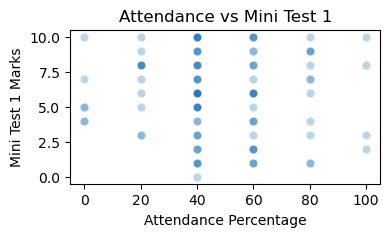

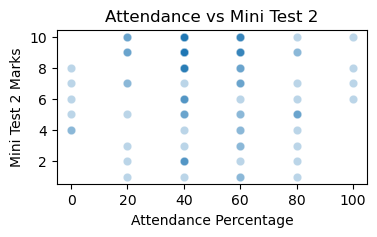

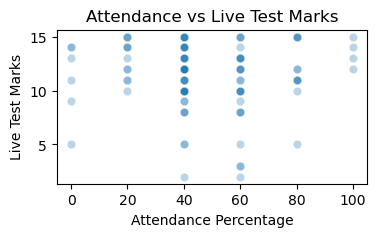

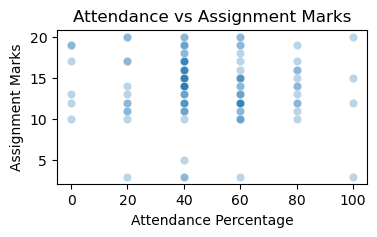

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Attendance vs Mini Test 1
plt.figure(figsize=(4, 2))
sns.scatterplot(x=merged_df['Attendance Percentage'], y=merged_df['Mini Test 1'], alpha=0.3)
plt.title('Attendance vs Mini Test 1')
plt.xlabel('Attendance Percentage')
plt.ylabel('Mini Test 1 Marks')
plt.show()

# Scatter plot for Attendance vs Mini Test 2
plt.figure(figsize=(4, 2))
sns.scatterplot(x=merged_df['Attendance Percentage'], y=merged_df['Mini Test 2'], alpha=0.3)
plt.title('Attendance vs Mini Test 2')
plt.xlabel('Attendance Percentage')
plt.ylabel('Mini Test 2 Marks')
plt.show()

# Scatter plot for Attendance vs Live Test
plt.figure(figsize=(4, 2))
sns.scatterplot(x=merged_df['Attendance Percentage'], y=merged_df['Live Test'],alpha=0.3) 
plt.title('Attendance vs Live Test Marks')
plt.xlabel('Attendance Percentage')
plt.ylabel('Live Test Marks')
plt.show()

# Scatter plot for Attendance vs Assignment
plt.figure(figsize=(4, 2))
sns.scatterplot(x=merged_df['Attendance Percentage'], y=merged_df['Assignment'],alpha=0.3)
plt.title('Attendance vs Assignment Marks')
plt.xlabel('Attendance Percentage')
plt.ylabel('Assignment Marks')
plt.show()

From the scatter plots and the correlation matrix, we can conclude the following:

Attendance has very little effect on the performance in Mini Test 1, Mini Test 2, Live Test, or Assignments. The weak correlations and scattered plots support the idea that attendance does not strongly influence academic performance in these assessments.

The relationships between the test scores (Mini Test 1, Mini Test 2, Live Test, Assignment) are also generally weak. Although there are some slight positive correlations (e.g., between Mini Test 1 and Live Test), the overall relationships are not strong enough to predict performance across tests or assignments reliably.

The results suggest that other factors, apart from attendance or individual test scores, likely play a more significant role in students' performance.

Visualization
1.	Create a bar chart displaying weighted percentages for top 5 students.
2.	Create a pie chart showing the distribution of students across the four performance categories.
3.	Create box plots for each test (Live Test, Mini Test 1, Mini Test 2, Assignment) to visualize the spread and detect potential outliers in scores.
4.	Create a chart to show the students where attendance is less than 50%.
5.	Any other visualization/analysis which you can infer from data for the management


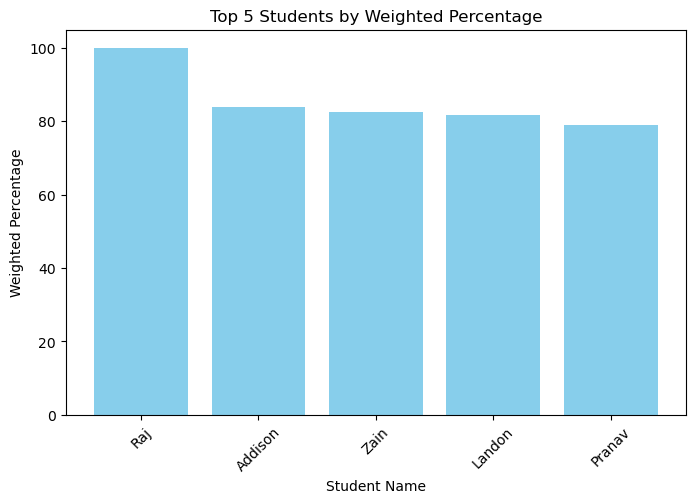

In [128]:
#1.	Create a bar chart displaying weighted percentages for top 5 students.
import matplotlib.pyplot as plt

# Sorting the DataFrame by 'Weighted Percentage' in descending order and geting top 5 students
top_5_students = merged_df[['Name', 'Weighted Percentage']].sort_values(by='Weighted Percentage', ascending=False).head(5)
plt.figure(figsize=(8, 5))
plt.bar(top_5_students['Name'], top_5_students['Weighted Percentage'], color='skyblue')
plt.xlabel('Student Name')
plt.ylabel('Weighted Percentage')
plt.title('Top 5 Students by Weighted Percentage')
plt.xticks(rotation=45)
plt.show()

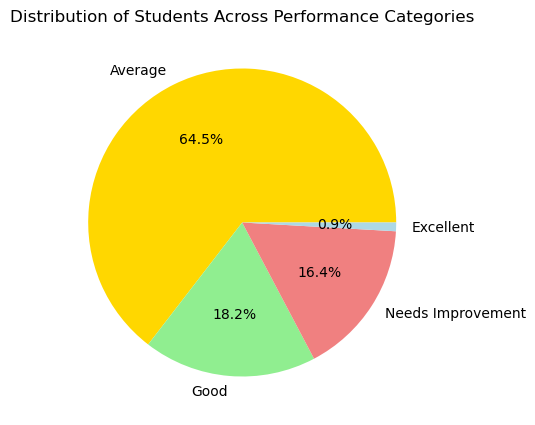

In [130]:
#2.	Create a pie chart showing the distribution of students across the four performance categories.
performance_counts = merged_df['Performance Category'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(performance_counts, labels=performance_counts.index, autopct='%1.1f%%', colors=['gold', 'lightgreen', 'lightcoral', 'lightblue'])
plt.title('Distribution of Students Across Performance Categories')
plt.show()

C:\Users\under\AppData\Local\Temp\ipykernel_6940\2730163296.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Test', y='Score', data=df_melted, palette='Set2')


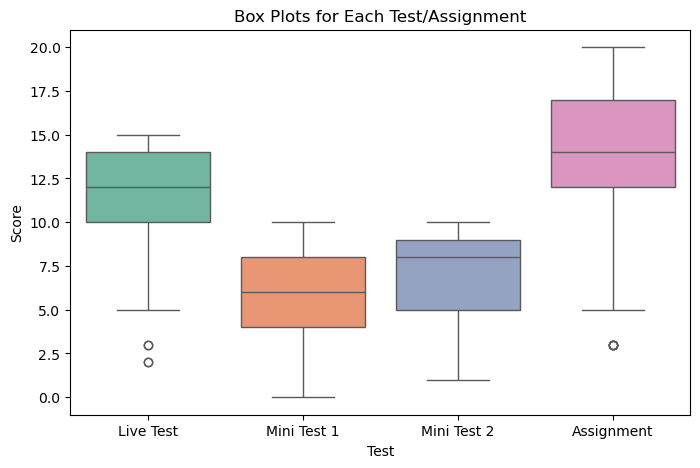

In [132]:
#3.	Create box plots for each test (Live Test, Mini Test 1, Mini Test 2, Assignment) to visualize the spread and detect potential outliers in scores.
# Melting the Dataframe for easier plotting with seaborn
tests_columns = ['Live Test', 'Mini Test 1', 'Mini Test 2', 'Assignment']
df_melted = merged_df.melt(id_vars=['Name'], value_vars=tests_columns, var_name='Test', value_name='Score')

plt.figure(figsize=(8, 5))
sns.boxplot(x='Test', y='Score', data=df_melted, palette='Set2')
plt.title('Box Plots for Each Test/Assignment')
plt.show()

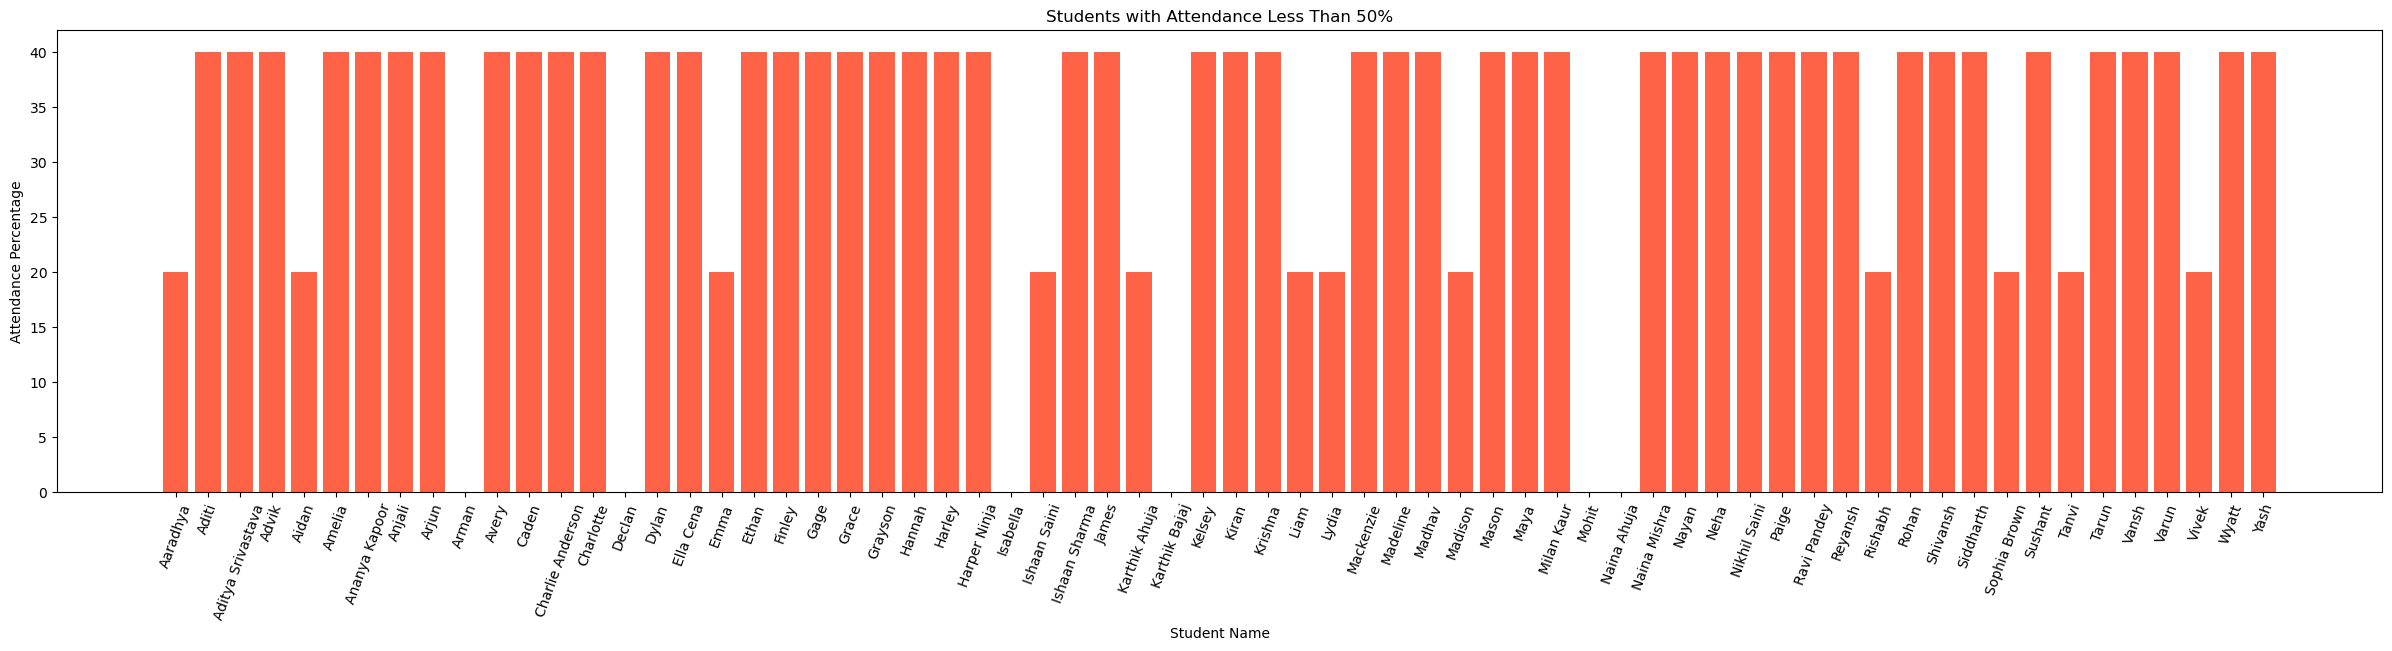

In [323]:
#4.	Create a chart to show the students where attendance is less than 50%.
low_attendance_students = merged_df[merged_df['Attendance Percentage'] < 50]
plt.figure(figsize=(30, 6))
plt.bar(low_attendance_students['Name'], low_attendance_students['Attendance Percentage'], color='tomato')
plt.xlabel('Student Name')
plt.ylabel('Attendance Percentage')
plt.title('Students with Attendance Less Than 50%')
plt.xticks(rotation=70)
plt.show()

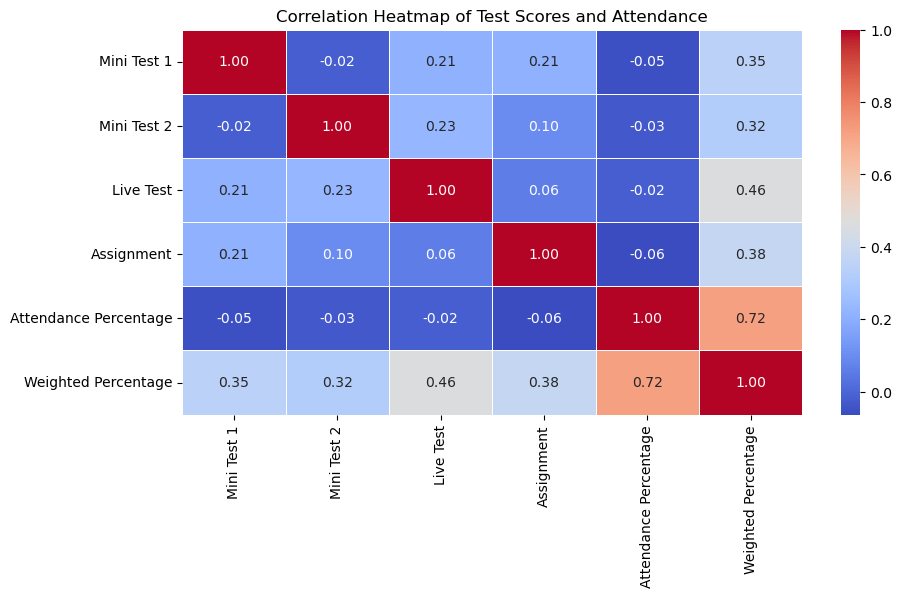

In [134]:
#Any other visualization/analysis which you can infer from data for the management
correlation_columns = ['Mini Test 1', 'Mini Test 2', 'Live Test', 'Assignment', 'Attendance Percentage', 'Weighted Percentage']
correlation_matrix = merged_df[correlation_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Test Scores and Attendance')
plt.show()

From the above heatmap we can conclude that:
Attendance appears to be more strongly linked to Weighted Percentage than any other individual test or assignment, which makes sense—students with better attendance likely stay more engaged in coursework and perform better overall.
Mini Test 1 and Mini Test 2 have relatively low correlations with each other and with attendance, but they do correlate somewhat with the Weighted Percentage, showing that performance on the mini tests has an influence on the overall grade.
The other variables (Live Test, Assignment) show moderate correlations with the Weighted Percentage, but weak correlations with attendance and each other.
This heatmap helps identify which variables are most strongly related to one another, allowing us to focus on areas with stronger relationships.